In [58]:
import pandas as pd
import pylab as plt
#plt.style.use('dark_background')
from jupyterthemes import jtplot
jtplot.style()
import seaborn as sns
from zedstat.ci import ci


In [59]:
rf=pd.read_csv('./irat_predictions.csv',index_col=0)
import numpy as np
rf=rf[rf['Influenza Virus']!='A/duck/New York/1996']
#rf=rf.replace(-1,np.nan).dropna()
rf['Geometric Mean'] = -1*rf['Geometric Mean']
rf

,Influenza Virus,Virus Type,Dates of Risk Assessment,Potential Emergence Estimate,Potential Impact Estimate,Summary Risk Score Category,HA Sequence,NA Sequence,HA Qnet Sample,NA Qnet Sample,HA Average Qdistance,NA Average Qdistance,Both Average Qdistance,Geometric Mean,Predicted Emergence Score,Predicted Impact Score
0,A/swine/Shandong/1207/2016,H1N1,Jul 2020,7.5,6.9,Moderate,MEARLFVLFCAFTTLKADTICVGYHANNSTDTVDTILEKNVTVTHS...,MNPNQKIITIGSICMTIGIASLILQIGNIISIWISHSIQIENQNQS...,1000.0,1000.0,0.094135,0.020530,0.057332,-0.043961,6.043770,6.187258
1,A/Ohio/13/2017,H3N2,Jul 2019,6.6,5.8,Moderate,MKTIIALSHILCLVFAQKLPGNDNNMATLCLGHHAVPNGTIVKTIT...,MNPNQKIITIGSVSLIIATICFLMQIAILVTTITLHFKQHNCDSSP...,1000.0,1000.0,0.018431,0.030623,0.024527,-0.023757,6.286471,6.153447
2,A/Hong Kong/125/2017,H7N9,May 2017,6.5,7.5,Moderate-High,MNTQILVFALIAIIPTNADKICLGHHAVSNGTKVNTLTERGVEVVN...,MNPNQKILCTSATAITIGAIAVLIGIANLGLNIGLHLKPGCNCSHS...,437.0,437.0,0.029599,0.005775,0.017687,-0.013074,6.585211,6.540149
3,A/Shanghai/02/2013,H7N9,Apr 2016,6.4,7.2,Moderate-High,MNTQILVFALIAIIPTNADKICLGHHAVSNGTKVNTLTERGVEVVN...,MNPNQKILCTSATAIIIGAIAVLIGMANLGLNIGLHLKPGCNCSHS...,178.0,178.0,0.005495,0.003556,0.004525,-0.004420,6.740483,6.620085
4,A/Anhui-Lujiang/39/2018,H9N2,Jul 2019,6.2,5.9,Moderate,METVSLITILLVATASNADKICIGYQSTNSTETVDTLTENNVPVTH...,MNPNQKITAIGSVSLIIAIICLLMQIAILTTTMTLHFGQKECSNPS...,31.0,30.0,0.029024,0.168090,0.098557,-0.069847,5.196902,5.002380
5,A/Indiana/08/2011,H3N2,Dec 2012,6.0,4.5,Moderate,MKTIIAFSCILCLIFAQKLPGSDNSMATLCLGHHAVPNGTLVKTIT...,MNPNQKIITIGSVSLIIATICFLMQIAILVTTVTLHFKQHDYNSPP...,1000.0,1000.0,0.052311,0.009103,0.030707,-0.021822,6.431361,6.457251
6,A/California/62/2018,H1N2,Jul 2019,5.8,5.7,Moderate,MKVKLMVLLCTFTATYADTICVGYHANNSTDTVDTVLEKNVTVTHS...,MNPNQKIITIGSISLTLAAMCFLMQTAILVTNVTLHFNQCECHYPP...,55.0,55.0,0.108902,0.060951,0.084926,-0.081472,5.363065,5.483384
7,A/Bangladesh/0994/2011,H9N2,Feb 2014,5.6,5.4,Moderate,METVSLMTILLLVTTSNADKICIGHQSTNSTETVDTLTETNVPVTH...,MNPNQKIIALGSASLTIAIICLLIQIAILATTMTLHFMQNEHTNST...,-1.0,-1.0,0.207800,0.182338,0.195069,-0.194653,4.338890,4.885887
8,A/Sichuan/06681/2021,H5N6,Oct 2021,5.3,6.3,Moderate,MENIVLLLAIVSLVKSDQICIGYHANNSTEQVDTIMEKNVTVTHAQ...,MNPNQKITCISATGVTLSIVSLLIGITNLGLNIGLHYKVSDSTTIN...,45.0,45.0,0.361591,0.051794,0.206692,-0.136852,5.202812,6.415099
9,A/Vietnam/1203/2004,H5N1,Nov 2011,5.2,6.6,Moderate,MEKIVLLFAIVSLVKSDQICIGYHANNSTEQVDTIMEKNVTVTHAQ...,MNPNQKIITIGSICMVTGIVSLMLQIGNMISIWVSHSIHTGNQHQS...,258.0,246.0,0.167254,0.011074,0.091342,-0.043037,6.218132,6.701150


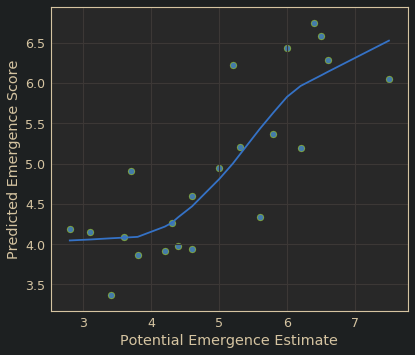

In [60]:
rf.plot.scatter(x='Potential Emergence Estimate',y='Predicted Emergence Score',color='g',s=50)
sns.regplot(x='Potential Emergence Estimate',y='Predicted Emergence Score',data=rf,lowess=1)

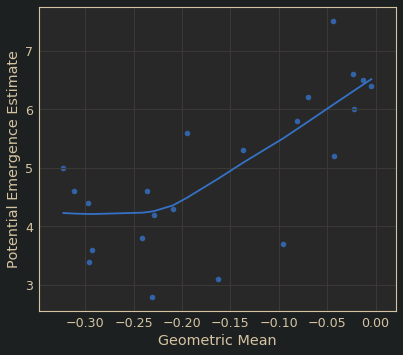

In [61]:
#rf.plot.scatter(y='Potential Emergence Estimate',x='Geometric Mean',color='g',s=50)
ax=sns.regplot(y='Potential Emergence Estimate',x='Geometric Mean',data=rf,lowess=1)


61.23560139479055 0.0002579111831184047 0.7037034213676274


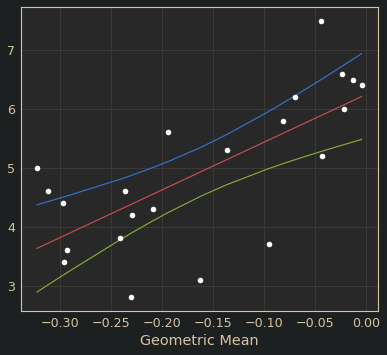

In [62]:
import matplotlib.pyplot as plt

xvar='Geometric Mean'
yvar='Potential Emergence Estimate'


pred,pval,aic,corr,est=ci(rf,xvar,yvar,alpha=.05)
fig, ax = plt.subplots()
pred.ub.plot()
pred.lb.plot()
pred.pred.plot()
rf.set_index(xvar)[yvar].plot(style='wo')
print(aic,pval,corr)

pred=pred.rename(columns={'pred':'pred_GM','ub':'ub_GM','lb':'lb_GM'})
rf0=rf.join(pred,on=xvar)

In [63]:
print(est.params)

[6.2466739  8.10631438]


52.71494874341595 4.747885597969362e-06 0.8107388277447942


,Influenza Virus,Virus Type,Dates of Risk Assessment,Potential Emergence Estimate,Potential Impact Estimate,Summary Risk Score Category,HA Sequence,NA Sequence,HA Qnet Sample,NA Qnet Sample,...,Both Average Qdistance,Geometric Mean,Predicted Emergence Score,Predicted Impact Score,pred_GM,lb_GM,ub_GM,pred_E,lb_E,ub_E
0,A/swine/Shandong/1207/2016,H1N1,Jul 2020,7.5,6.9,Moderate,MEARLFVLFCAFTTLKADTICVGYHANNSTDTVDTILEKNVTVTHS...,MNPNQKIITIGSICMTIGIASLILQIGNIISIWISHSIQIENQNQS...,1000.0,1000.0,...,0.057332,-0.043961,6.043770,6.187258,5.890315,5.279080,6.501549,6.043770,5.538074,6.549466
1,A/Ohio/13/2017,H3N2,Jul 2019,6.6,5.8,Moderate,MKTIIALSHILCLVFAQKLPGNDNNMATLCLGHHAVPNGTIVKTIT...,MNPNQKIITIGSVSLIIATICFLMQIAILVTTITLHFKQHNCDSSP...,1000.0,1000.0,...,0.024527,-0.023757,6.286471,6.153447,6.054093,5.384125,6.724061,6.286471,5.717802,6.855140
2,A/Hong Kong/125/2017,H7N9,May 2017,6.5,7.5,Moderate-High,MNTQILVFALIAIIPTNADKICLGHHAVSNGTKVNTLTERGVEVVN...,MNPNQKILCTSATAITIGAIAVLIGIANLGLNIGLHLKPGCNCSHS...,437.0,437.0,...,0.017687,-0.013074,6.585211,6.540149,6.140695,5.438230,6.843159,6.585211,5.933283,7.237139
3,A/Shanghai/02/2013,H7N9,Apr 2016,6.4,7.2,Moderate-High,MNTQILVFALIAIIPTNADKICLGHHAVSNGTKVNTLTERGVEVVN...,MNPNQKILCTSATAIIIGAIAVLIGMANLGLNIGLHLKPGCNCSHS...,178.0,178.0,...,0.004525,-0.004420,6.740483,6.620085,6.210842,5.481445,6.940240,6.740483,6.043471,7.437496
4,A/Anhui-Lujiang/39/2018,H9N2,Jul 2019,6.2,5.9,Moderate,METVSLITILLVATASNADKICIGYQSTNSTETVDTLTENNVPVTH...,MNPNQKITAIGSVSLIIAIICLLMQIAILTTTMTLHFGQKECSNPS...,31.0,30.0,...,0.098557,-0.069847,5.196902,5.002380,5.680475,5.137720,6.223229,5.196902,4.844311,5.549492
5,A/Indiana/08/2011,H3N2,Dec 2012,6.0,4.5,Moderate,MKTIIAFSCILCLIFAQKLPGSDNSMATLCLGHHAVPNGTLVKTIT...,MNPNQKIITIGSVSLIIATICFLMQIAILVTTVTLHFKQHDYNSPP...,1000.0,1000.0,...,0.030707,-0.021822,6.431361,6.457251,6.069778,5.393991,6.745565,6.431361,5.822966,7.039756
6,A/California/62/2018,H1N2,Jul 2019,5.8,5.7,Moderate,MKVKLMVLLCTFTATYADTICVGYHANNSTDTVDTVLEKNVTVTHS...,MNPNQKIITIGSISLTLAAMCFLMQTAILVTNVTLHFNQCECHYPP...,55.0,55.0,...,0.084926,-0.081472,5.363065,5.483384,5.586238,5.071021,6.101455,5.363065,4.992560,5.733569
7,A/Bangladesh/0994/2011,H9N2,Feb 2014,5.6,5.4,Moderate,METVSLMTILLLVTTSNADKICIGHQSTNSTETVDTLTETNVPVTH...,MNPNQKIIALGSASLTIAIICLLIQIAILATTMTLHFMQNEHTNST...,-1.0,-1.0,...,0.195069,-0.194653,4.338890,4.885887,4.668755,4.235552,5.101957,4.338890,3.942515,4.735265
8,A/Sichuan/06681/2021,H5N6,Oct 2021,5.3,6.3,Moderate,MENIVLLLAIVSLVKSDQICIGYHANNSTEQVDTIMEKNVTVTHAQ...,MNPNQKITCISATGVTLSIVSLLIGITNLGLNIGLHYKVSDSTTIN...,45.0,45.0,...,0.206692,-0.136852,5.202812,6.415099,5.137312,4.712180,5.562445,5.202812,4.849721,5.555903
9,A/Vietnam/1203/2004,H5N1,Nov 2011,5.2,6.6,Moderate,MEKIVLLFAIVSLVKSDQICIGYHANNSTEQVDTIMEKNVTVTHAQ...,MNPNQKIITIGSICMVTGIVSLMLQIGNMISIWVSHSIHTGNQHQS...,258.0,246.0,...,0.091342,-0.043037,6.218132,6.701150,5.897802,5.283971,6.511633,6.218132,5.667694,6.768571


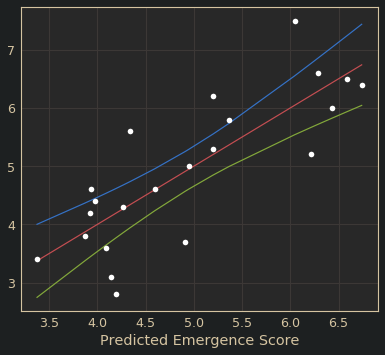

In [64]:
yvar='Potential Emergence Estimate'
xvar='Predicted Emergence Score'

pred,pval,aic,corr,est=ci(rf,xvar,yvar,alpha=.05)
fig, ax = plt.subplots()
pred.ub.plot()
pred.lb.plot()
pred.pred.plot()
rf.set_index(xvar)[yvar].plot(style='wo')
print(aic,pval,corr)
pred=pred.rename(columns={'pred':'pred_E','ub':'ub_E','lb':'lb_E'})
rf1=rf0.join(pred,on=xvar)
rf1

In [65]:
est.params

array([1.11022302e-15, 1.00000000e+00])

55.22705059781049 3.343599555301797e-05 0.7651911631918318


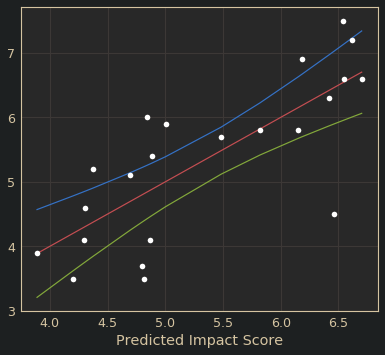

In [66]:
yvar='Potential Impact Estimate'
xvar='Predicted Impact Score'
    
pred,pval,aic,corr,est=ci(rf,xvar,yvar,alpha=.05)
fig, ax = plt.subplots()
pred.ub.plot()
pred.lb.plot()
pred.pred.plot()
rf.set_index(xvar)[yvar].plot(style='wo')
print(aic,pval,corr)
pred=pred.rename(columns={'pred':'pred_I','ub':'ub_I','lb':'lb_I'})
rf2=rf1.join(pred,on=xvar)

In [67]:
est.params

array([-8.8817842e-16,  1.0000000e+00])

In [68]:
rf2

,Influenza Virus,Virus Type,Dates of Risk Assessment,Potential Emergence Estimate,Potential Impact Estimate,Summary Risk Score Category,HA Sequence,NA Sequence,HA Qnet Sample,NA Qnet Sample,...,Predicted Impact Score,pred_GM,lb_GM,ub_GM,pred_E,lb_E,ub_E,pred_I,lb_I,ub_I
0,A/swine/Shandong/1207/2016,H1N1,Jul 2020,7.5,6.9,Moderate,MEARLFVLFCAFTTLKADTICVGYHANNSTDTVDTILEKNVTVTHS...,MNPNQKIITIGSICMTIGIASLILQIGNIISIWISHSIQIENQNQS...,1000.0,1000.0,...,6.187258,5.890315,5.279080,6.501549,6.043770,5.538074,6.549466,6.187258,5.701093,6.673424
1,A/Ohio/13/2017,H3N2,Jul 2019,6.6,5.8,Moderate,MKTIIALSHILCLVFAQKLPGNDNNMATLCLGHHAVPNGTIVKTIT...,MNPNQKIITIGSVSLIIATICFLMQIAILVTTITLHFKQHNCDSSP...,1000.0,1000.0,...,6.153447,6.054093,5.384125,6.724061,6.286471,5.717802,6.855140,6.153447,5.676050,6.630844
2,A/Hong Kong/125/2017,H7N9,May 2017,6.5,7.5,Moderate-High,MNTQILVFALIAIIPTNADKICLGHHAVSNGTKVNTLTERGVEVVN...,MNPNQKILCTSATAITIGAIAVLIGIANLGLNIGLHLKPGCNCSHS...,437.0,437.0,...,6.540149,6.140695,5.438230,6.843159,6.585211,5.933283,7.237139,6.540149,5.952309,7.127988
3,A/Shanghai/02/2013,H7N9,Apr 2016,6.4,7.2,Moderate-High,MNTQILVFALIAIIPTNADKICLGHHAVSNGTKVNTLTERGVEVVN...,MNPNQKILCTSATAIIIGAIAVLIGMANLGLNIGLHLKPGCNCSHS...,178.0,178.0,...,6.620085,6.210842,5.481445,6.940240,6.740483,6.043471,7.437496,6.620085,6.007207,7.232963
4,A/Anhui-Lujiang/39/2018,H9N2,Jul 2019,6.2,5.9,Moderate,METVSLITILLVATASNADKICIGYQSTNSTETVDTLTENNVPVTH...,MNPNQKITAIGSVSLIIAIICLLMQIAILTTTMTLHFGQKECSNPS...,31.0,30.0,...,5.002380,5.680475,5.137720,6.223229,5.196902,4.844311,5.549492,5.002380,4.614665,5.390096
5,A/Indiana/08/2011,H3N2,Dec 2012,6.0,4.5,Moderate,MKTIIAFSCILCLIFAQKLPGSDNSMATLCLGHHAVPNGTLVKTIT...,MNPNQKIITIGSVSLIIATICFLMQIAILVTTVTLHFKQHDYNSPP...,1000.0,1000.0,...,6.457251,6.069778,5.393991,6.745565,6.431361,5.822966,7.039756,6.457251,5.894706,7.019796
6,A/California/62/2018,H1N2,Jul 2019,5.8,5.7,Moderate,MKVKLMVLLCTFTATYADTICVGYHANNSTDTVDTVLEKNVTVTHS...,MNPNQKIITIGSISLTLAAMCFLMQTAILVTNVTLHFNQCECHYPP...,55.0,55.0,...,5.483384,5.586238,5.071021,6.101455,5.363065,4.992560,5.733569,5.483384,5.118547,5.848221
7,A/Bangladesh/0994/2011,H9N2,Feb 2014,5.6,5.4,Moderate,METVSLMTILLLVTTSNADKICIGHQSTNSTETVDTLTETNVPVTH...,MNPNQKIIALGSASLTIAIICLLIQIAILATTMTLHFMQNEHTNST...,-1.0,-1.0,...,4.885887,4.668755,4.235552,5.101957,4.338890,3.942515,4.735265,4.885887,4.479422,5.292351
8,A/Sichuan/06681/2021,H5N6,Oct 2021,5.3,6.3,Moderate,MENIVLLLAIVSLVKSDQICIGYHANNSTEQVDTIMEKNVTVTHAQ...,MNPNQKITCISATGVTLSIVSLLIGITNLGLNIGLHYKVSDSTTIN...,45.0,45.0,...,6.415099,5.137312,4.712180,5.562445,5.202812,4.849721,5.555903,6.415099,5.865125,6.965073
9,A/Vietnam/1203/2004,H5N1,Nov 2011,5.2,6.6,Moderate,MEKIVLLFAIVSLVKSDQICIGYHANNSTEQVDTIMEKNVTVTHAQ...,MNPNQKIITIGSICMVTGIVSLMLQIGNMISIWVSHSIHTGNQHQS...,258.0,246.0,...,6.701150,5.897802,5.283971,6.511633,6.218132,5.667694,6.768571,6.701150,6.062309,7.339992


In [69]:
rf2.to_csv('fulldataframe.csv')

In [70]:
! cat fulldataframe.csv

,Influenza Virus,Virus Type,Dates of Risk Assessment,Potential Emergence Estimate,Potential Impact Estimate,Summary Risk Score Category,HA Sequence,NA Sequence,HA Qnet Sample,NA Qnet Sample,HA Average Qdistance,NA Average Qdistance,Both Average Qdistance,Geometric Mean,Predicted Emergence Score,Predicted Impact Score,pred_GM,lb_GM,ub_GM,pred_E,lb_E,ub_E,pred_I,lb_I,ub_I
0,A/swine/Shandong/1207/2016,H1N1,Jul 2020,7.5,6.9,Moderate,MEARLFVLFCAFTTLKADTICVGYHANNSTDTVDTILEKNVTVTHSVNLLENSHNGKLCSLNGKIPLQLGNCNVAGWILGNPKCDLLLTANSWSYIIETSNSKNGACYPGEFADYEELKEQLSTVSSFERFEIFPKATSWPNHDTTRGTTVACSHSGANSFYRNLLWIVKKGNSYPKLSKSYTNNKGKEVLVIWGVHHPPTESDQQTLYQNNHTYVSVGSSKYYKRFTPEIVARPKVREQAGRMNYYWTLLDQGDTITFEATGNLIAPWHAFALKKGSSSGIMRSDAQVHNCTTKCQTPHGALKGNLPFQNVHPVTIGKCPKYVKSTQLRMATGLRNIPSIQSRGLFGAIAGFIEGGWTGMVDGWYGYHHRNEQGSGYAADQKSTQIAIDGISNKVNSVIEKMNIQFTSVGKEFNSLEKRMENLNKKVDDGFLDVWTYNAELLILLENERTLDFHDLNVKNLYEKVKSQLRNNAKEIGNGCFEFYHKCDNECMESVKNGTYNYPKYSEESKLNREEIDGVKLESMGIHQILAIYSTVASSLVLLVSLGAISFWMCSNGSLQCRVCI,